In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# from ngram_trial import accuracy
import re

biased = pd.DataFrame.from_csv('ngram_results/biased_trial.csv')
unbiased = pd.DataFrame.from_csv('ngram_results/unbiased_trial.csv')
sent = pd.DataFrame.from_csv('ngram_results/sent_trial.csv')
length = pd.DataFrame.from_csv('ngram_results/length_trial.csv')

def accuracy(results):
    n = results.groupby('Expected')['Expected'].count()[0]
    correct = results['Expected'] == results['Actual']
    return results[correct].groupby('Expected')['Expected'].count() / n

def tweakAccuracy(data):
    data.index.name = 'Language'
    data.index = data.index.map(lambda x: re.match("([a-zA-Z]+)(\w+)?-\w+", x)[1])
    return data

def tweakDist(data):
    data.columns = data.columns.map(lambda x: re.match("([a-zA-Z]+)(\w+)?-\w+", x)[1] if re.match("([a-zA-Z]+)(\w+)?-\w+", x) else x)
    return data

def createChart(data, fname, kind='bar', title=None):
    data.plot(kind=kind)
    if title is not None:
        plt.title(title)
    plt.savefig(fname)
    return plt.show()

# Biased Accuracy

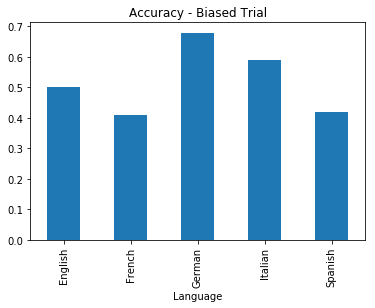

In [90]:
createChart(tweakAccuracy(accuracy(biased)), "ngram_results/biased_accuracy.png", title="Accuracy - Biased Trial")

# Unbiased Accuracy

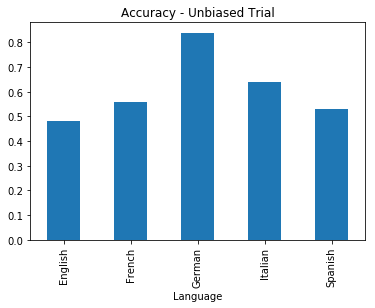

In [4]:
createChart(tweakAccuracy(accuracy(unbiased)), "ngram_results/unbiased_accuracy.png", title="Accuracy - Unbiased Trial")

# Sentence Accuracy

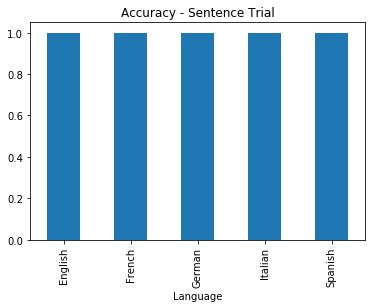

In [5]:
createChart(tweakAccuracy(accuracy(sent)), "ngram_results/sent_accuracy.png", title="Accuracy - Sentence Trial")

# English - Biased Prediction Distributions

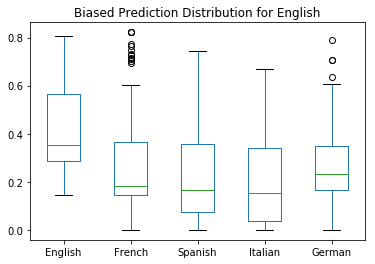

In [6]:
english = biased[biased['Expected'] == 'English-Latin1']
createChart(tweakDist(english), "ngram_results/biased_dist.png", kind="box", title="Biased Prediction Distribution for English")

# English - Unbiased Prediction Distributions

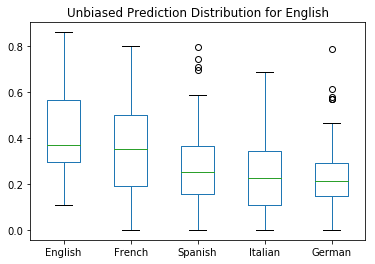

In [7]:
english = unbiased[unbiased['Expected'] == 'English-Latin1']
createChart(tweakDist(english), "ngram_results/unbiased_dist.png", kind="box", title="Unbiased Prediction Distribution for English")

# English - Sentence Prediction Distributions

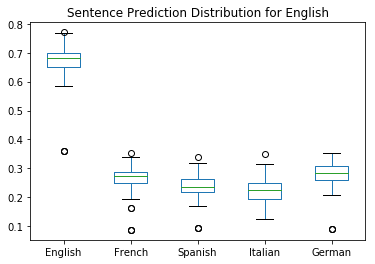

In [8]:
english = sent[sent['Expected'] == 'English-Latin1']
createChart(tweakDist(english), "ngram_results/sent_dist.png", kind="box", title="Sentence Prediction Distribution for English")

# English - Accuracy by Length

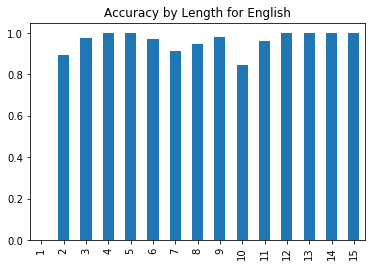

In [9]:
english = length[length['Language'] == 'English-Latin1']
length_acc = pd.Series(index=english['Length'].get_values(), data=english['Accuracy'].get_values()).sort_index()

# length_acc

createChart(length_acc, "ngram_results/english_length_accuracy.png", kind="bar", title="Accuracy by Length for English")

# Spanish - Accuracy by Length

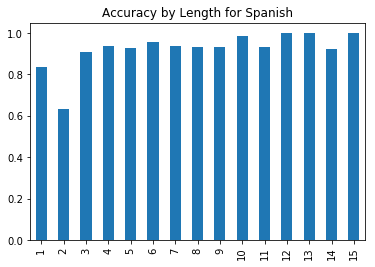

In [10]:
spanish = length[length['Language'] == 'Spanish-Latin1']
length_acc = pd.Series(index=spanish['Length'].get_values(), data=spanish['Accuracy'].get_values()).sort_index()

# length_acc

createChart(length_acc, "ngram_results/spanish_length_accuracy.png", kind="bar", title="Accuracy by Length for Spanish")

# French - Accuracy by Length

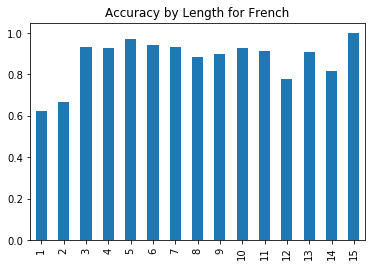

In [11]:
french = length[length['Language'] == 'French_Francais-Latin1']
length_acc = pd.Series(index=french['Length'].get_values(), data=french['Accuracy'].get_values()).sort_index()

# length_acc

createChart(length_acc, "ngram_results/french_length_accuracy.png", kind="bar", title="Accuracy by Length for French")

# Italian - Accuracy by Length

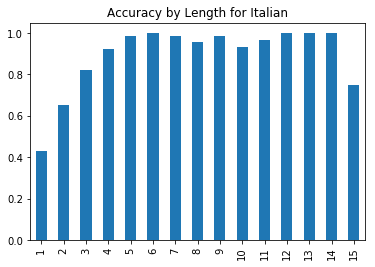

In [12]:
italian = length[length['Language'] == 'Italian-Latin1']
length_acc = pd.Series(index=italian['Length'].get_values(), data=italian['Accuracy'].get_values()).sort_index()

# length_acc

createChart(length_acc, "ngram_results/italian_length_accuracy.png", kind="bar", title="Accuracy by Length for Italian")

# German - Accuracy by Length

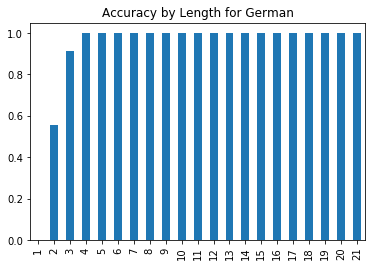

In [13]:
german = length[length['Language'] == 'German_Deutsch-Latin1']
length_acc = pd.Series(index=german['Length'].get_values(), data=german['Accuracy'].get_values()).sort_index()

# length_acc

createChart(length_acc, "ngram_results/german_length_accuracy.png", kind="bar", title="Accuracy by Length for German")